In [50]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
train=pd.read_csv('F:/dataquest dataset/traindata_R.csv')
test=pd.read_csv('F:/dataquest dataset/testdata_R.csv')

In [52]:
train.head()

,Wife_age,Wife_education,Husband_education,Number_of_children_ever_born,Wife_religion,Wife_working,Husband_occupation,Standard_of_living_index,Media_exposure,Party_voted_for
0,24,2,3,3,1,1,2,3,0,0
1,43,2,3,7,1,1,3,4,0,0
2,36,3,3,8,1,1,3,2,0,0
3,19,4,4,0,1,1,3,3,0,0
4,38,2,3,6,1,1,3,2,0,0


In [53]:
train.columns

Index(['Wife_age', 'Wife_education', 'Husband_education',
       'Number_of_children_ever_born', 'Wife_religion', 'Wife_working',
       'Husband_occupation', 'Standard_of_living_index', 'Media_exposure',
       'Party_voted_for'],
      dtype='object')

## No Missing Values

In [55]:
train.isnull().sum()

Wife_age                        0
Wife_education                  0
Husband_education               0
Number_of_children_ever_born    0
Wife_religion                   0
Wife_working                    0
Husband_occupation              0
Standard_of_living_index        0
Media_exposure                  0
Party_voted_for                 0
dtype: int64

In [56]:
test.isnull().sum()

Wife_age                        0
Wife_education                  0
Husband_education               0
Number_of_children_ever_born    0
Wife_religion                   0
Wife_working                    0
Husband_occupation              0
Standard_of_living_index        0
Media_exposure                  0
Party_voted_for                 0
dtype: int64

## Exploratory Analysis

In [18]:
pd.crosstab(train['Standard_of_living_index'],train['Party_voted_for'])

Party_voted_for,0,1
Standard_of_living_index,,
1,45,33
2,89,83
3,130,157
4,158,287


In [19]:
pd.crosstab(test['Standard_of_living_index'],test['Party_voted_for'])

Party_voted_for,0,1
Standard_of_living_index,,
1,35,16
2,28,29
3,54,90
4,90,149


In [20]:
train['Wife_age'].describe()

count    982.000000
mean      32.571283
std        8.145749
min       16.000000
25%       26.000000
50%       32.000000
75%       38.000000
max       49.000000
Name: Wife_age, dtype: float64

In [21]:
test['Wife_age'].describe()

count    491.000000
mean      32.472505
std        8.395866
min       16.000000
25%       25.000000
50%       32.000000
75%       39.000000
max       49.000000
Name: Wife_age, dtype: float64

In [22]:
train['Party_voted_for'].value_counts()/train.shape[0]

1    0.570265
0    0.429735
Name: Party_voted_for, dtype: float64

In [23]:
test['Party_voted_for'].value_counts()/test.shape[0]

1    0.578411
0    0.421589
Name: Party_voted_for, dtype: float64

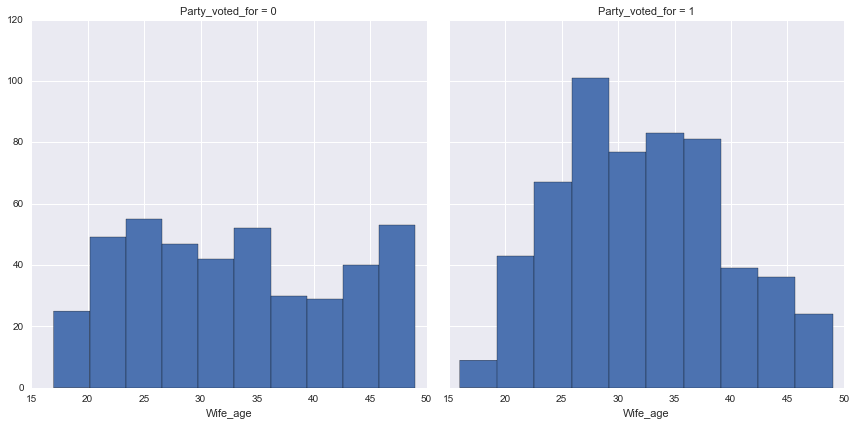

In [24]:
g=sns.FacetGrid(train,col='Party_voted_for',size=6)
g.map(plt.hist,'Wife_age')

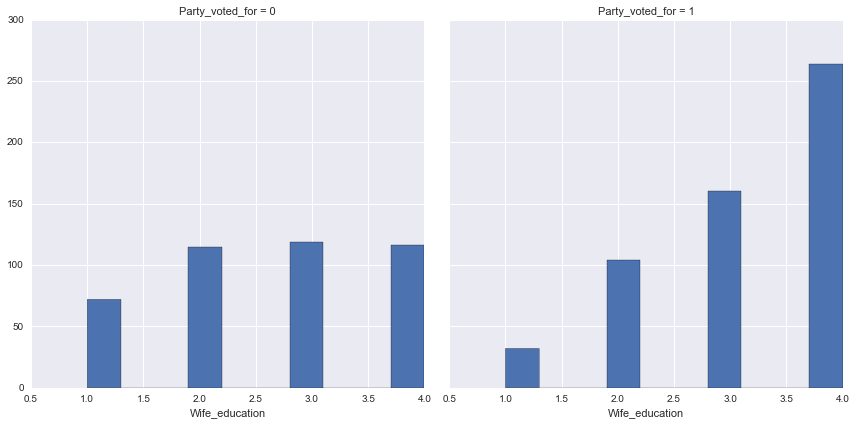

In [25]:
g=sns.FacetGrid(train,col='Party_voted_for',size=6)
g.map(plt.hist,'Wife_education')

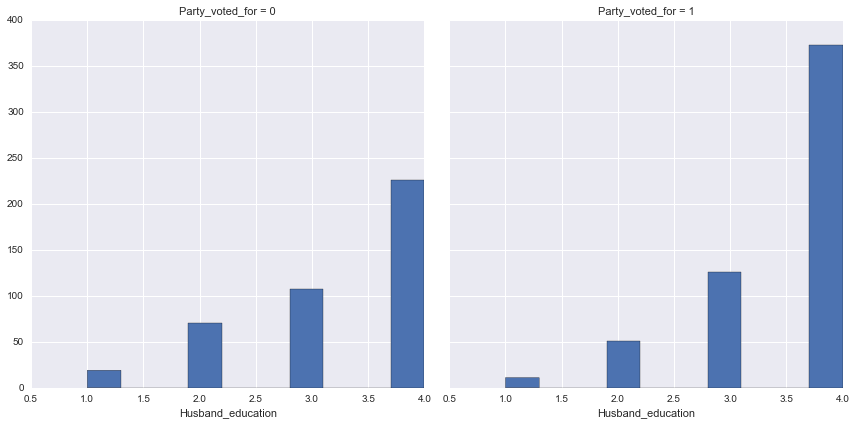

In [26]:
g=sns.FacetGrid(train,col='Party_voted_for',size=6)
g.map(plt.hist,'Husband_education')

### Adding New Features

In [27]:
train['Education']=train['Wife_education']+train['Husband_education']
test['Education']=test['Wife_education']+test['Husband_education']

In [28]:
pd.crosstab(train['Education'],train['Party_voted_for'])

Party_voted_for,0,1
Education,,
2,15,4
3,30,15
4,52,44
5,66,52
6,77,96
7,69,102
8,113,247


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import metrics

In [30]:
features=['Wife_age', 'Wife_education', 'Husband_education',
       'Number_of_children_ever_born', 'Wife_religion', 'Wife_working',
       'Husband_occupation', 'Standard_of_living_index', 'Media_exposure',
       'Education']
target=['Party_voted_for']          

## Building a Classification Model

1. Problems- As for a binary classification model we have a threshhold =0.5 and changing that is a business decision. 
2. In this case we are concerned to correctly predict the no. of votes received by Culter 
3. Thus what we want is a lower no. of False Positive Rate(actual 0....predicted 1)
4. Thus we can also tweak with the threshold 

### Logistic Regression Model

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The f1_score of the model is 0.780031201248
The accuracy of the model is 0.71283095723


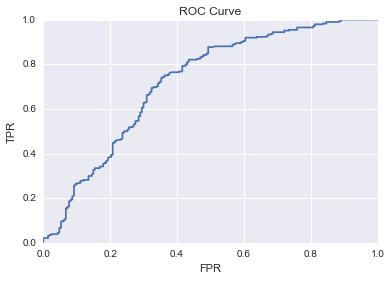

The auc score of the model is 0.720095937947


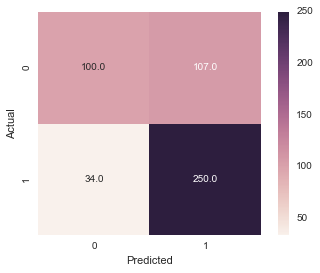

In [31]:
lr=LogisticRegression(random_state=11)
lr.fit(train[features],train[target])
predictions=lr.predict(test[features])
prob=lr.predict_proba(test[features])
print('The f1_score of the model is',f1_score(predictions,test[target]))
print('The accuracy of the model is',metrics.accuracy_score(test[target],predictions))
fpr1,tpr1,threshold=metrics.roc_curve(test[target],prob[:,1])
plt.plot(fpr1,tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()
print('The auc score of the model is',metrics.roc_auc_score(test[target], prob[:,1]))
cm=metrics.confusion_matrix(test[target],predictions)
sns.heatmap(cm,square=True,annot=True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## DecisionTree Model

The f1_score of the model is 0.78955453149
The accuracy of the model is 0.720977596741


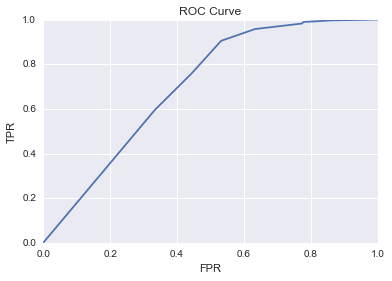

The auc score of the model is 0.703442879499


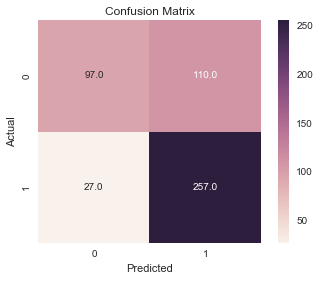

In [32]:
lr=DecisionTreeClassifier(max_depth=4,random_state=13)
lr.fit(train[features],train[target])
predictions=lr.predict(test[features])
prob=lr.predict_proba(test[features])
print('The f1_score of the model is',f1_score(predictions,test[target]))
print('The accuracy of the model is',metrics.accuracy_score(test[target],predictions))
fpr2,tpr2,threshold=metrics.roc_curve(test[target],prob[:,1])
plt.show()
plt.plot(fpr2,tpr2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()
print('The auc score of the model is',metrics.roc_auc_score(test[target], prob[:,1]))
cm=metrics.confusion_matrix(test[target],predictions)
sns.heatmap(cm,square=True,annot=True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

### Trained Model using Random Forest
1. Plotting threshold vs fpr
2. Plotting threshold vs tpr
3. Tweaked the threshold to reduce the no. of false positive case and increase the no. of true negatives
3. The value of threshold is a business decision
4. In this problem we want to increse the no. of correct votes received by Culter
5. Here we should try to increse the value of threshold 

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


The f1_score of the model is 0.874113475177
The accuracy of the model is 0.855397148676


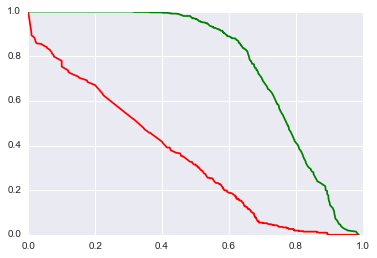

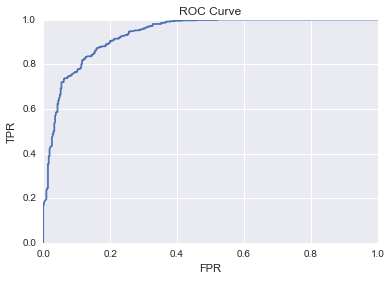

The auc score of the model is 0.934076675694


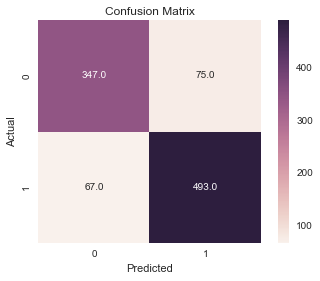

In [33]:
lr=RandomForestClassifier(max_depth=9,random_state=13)
lr.fit(train[features],train[target])
predictions=lr.predict(train[features])
prob=lr.predict_proba(train[features])
predictions=[]
# We try to inc the threhold to reduce the fpr
for i in prob[:,1]:
    if i>=0.615:
        predictions.append(1)
    else:
        predictions.append(0)
print('The f1_score of the model is',f1_score(predictions,train[target]))
print('The accuracy of the model is',metrics.accuracy_score(train[target],predictions))
fpr,tpr,threshold=metrics.roc_curve(train[target],prob[:,1])
plt.plot(threshold,fpr,c='r')
plt.plot(threshold,tpr,c='g')
plt.show()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()
print('The auc score of the model is',metrics.roc_auc_score(train[target], prob[:,1]))
cm=metrics.confusion_matrix(train[target],predictions)
sns.heatmap(cm,square=True,annot=True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

### Applying the Model RandomForest on the Test Data

The f1_score of the model is 0.724381625442
The accuracy of the model is 0.682281059063


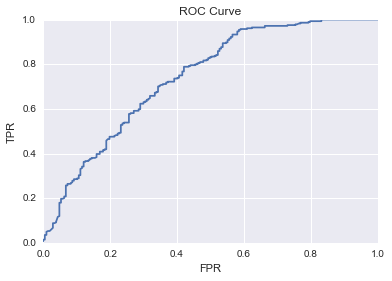

The auc score of the model is 0.741035585494


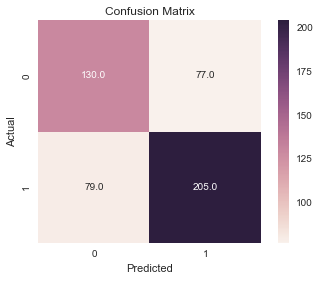

In [34]:
predictions=lr.predict(test[features])
prob=lr.predict_proba(test[features])
predictions=[]
for i in prob[:,1]:
    if i>=0.6278:
        predictions.append(1)
    else:
        predictions.append(0)
print('The f1_score of the model is',f1_score(predictions,test[target]))
print('The accuracy of the model is',metrics.accuracy_score(test[target],predictions))
fpr3,tpr3,threshold=metrics.roc_curve(test[target],prob[:,1])
plt.plot(fpr3,tpr3)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curve")
plt.show()
print('The auc score of the model is',metrics.roc_auc_score(test[target], prob[:,1]))
cm=metrics.confusion_matrix(test[target],predictions)
sns.heatmap(cm,square=True,annot=True,fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

#### Results
1. Out of 207 votes that is received by Culter we predict 209 votes would be received
2. Though there is a catch here
3. We have correctly predicted only 130(True Negatives) votes but there is 79 votes which are false_negative.
4. This might not be the best model but out of Logistic and Decision Tree this  is the best one

## Contains answers to assignment questions

### Part 1: Data manipulation and summary statistics
Q1. For the women in the train dataset find the following variables for every category of education.  
1.	Count of people
2.	Average age
3.	Average number of children
4.	Percentage of women who are working
5.	Percentage of women who have a high standard of living (Standard_of_living_index = 4)
There are 4 categories for Wife_education and 5 variables required, so you should get 20 values. It is advised to represent all the numbers in a single dataframe. 


## Contains the answers in a DataFrame as well

In [38]:
train['Wife_education'].value_counts()

4    380
3    279
2    219
1    104
Name: Wife_education, dtype: int64

In [39]:
print('The mean of age when education category is 1: ',train[(train['Wife_education']==1)]['Wife_age'].mean())
print('The mean of age when education category is 2: ',train[(train['Wife_education']==2)]['Wife_age'].mean())
print('The mean of age when education category is 3: ',train[(train['Wife_education']==3)]['Wife_age'].mean())
print('The mean of age when education category is 4: ',train[(train['Wife_education']==4)]['Wife_age'].mean())

The mean of age when education category is 1:  38.09615384615385
The mean of age when education category is 2:  31.45662100456621
The mean of age when education category is 3:  30.22222222222222
The mean of age when education category is 4:  33.42631578947368


In [40]:
print('The avereage number of children when education category is 1: ',train[(train['Wife_education']==1)]
      ['Number_of_children_ever_born'].mean())
print('The avereage number of children when education category is 2: ',train[(train['Wife_education']==2)]
      ['Number_of_children_ever_born'].mean())
print('The avereage number of children when education category is 3: ',train[(train['Wife_education']==3)]
      ['Number_of_children_ever_born'].mean())
print('The avereage number of children when education category is 4: ',train[(train['Wife_education']==4)]
      ['Number_of_children_ever_born'].mean())


The avereage number of children when education category is 1:  4.153846153846154
The avereage number of children when education category is 2:  3.4840182648401825
The avereage number of children when education category is 3:  3.1469534050179213
The avereage number of children when education category is 4:  2.8026315789473686


In [41]:
print('The percentage of working women for different education category: ',(train[(train['Wife_education']==1)]
                                                                            ['Wife_working']==1).sum()/train[(train['Wife_education']==1)].shape[0])
print('The percentage of working women for different education category: ',(train[(train['Wife_education']==2)]
                                                                            ['Wife_working']==1).sum()/train[(train['Wife_education']==2)].shape[0])
print('The percentage of working women for different education category: ',(train[(train['Wife_education']==3)]
                                                                            ['Wife_working']==1).sum()/train[(train['Wife_education']==3)].shape[0])
print('The percentage of working women for different education category: ',(train[(train['Wife_education']==4)]
                                                                            ['Wife_working']==1).sum()/train[(train['Wife_education']==4)].shape[0])

The percentage of working women for different education category:  0.759615384615
The percentage of working women for different education category:  0.762557077626
The percentage of working women for different education category:  0.784946236559
The percentage of working women for different education category:  0.694736842105


In [42]:
print('The percentage of women who have high standard of living for different education category: ',(train[(train['Wife_education']==1)]
                                                                                                     ['Standard_of_living_index']==4).sum()/len(train[train['Wife_education']==1]))
print('The percentage of women who have high standard of living for different education category: ',(train[(train['Wife_education']==2)]
                                                                                                     ['Standard_of_living_index']==4).sum()/train[(train['Wife_education']==2)].shape[0])
print('The percentage of women who have high standard of living for different education category: ',(train[(train['Wife_education']==3)]
                                                                                                     ['Standard_of_living_index']==4).sum()/train[(train['Wife_education']==3)].shape[0])
print('The percentage of women who have high standard of living for different education category: ',(train[(train['Wife_education']==4)]
                                                                                                     ['Standard_of_living_index']==4).sum()/train[(train['Wife_education']==4)].shape[0])

The percentage of women who have high standard of living for different education category:  0.230769230769
The percentage of women who have high standard of living for different education category:  0.328767123288
The percentage of women who have high standard of living for different education category:  0.336917562724
The percentage of women who have high standard of living for different education category:  0.671052631579


In [43]:
average_age=[]
average_children=[]
per_working=[]
per_standard=[]
for i in range(1,5):
    average_age.append(train[(train['Wife_education']==i)]['Wife_age'].mean())
    average_children.append(train[(train['Wife_education']==i)]['Number_of_children_ever_born'].mean())
    per_working.append((train[(train['Wife_education']==i)]['Wife_working']==1).sum()/
                       len(train[(train['Wife_education']==i)]))
    per_standard.append((train[(train['Wife_education']==i)]['Standard_of_living_index']==4).sum()/
                        len(train[train['Wife_education']==i]))
   

In [44]:
raw_data={'Education_Category':[1,2,3,4],'Count':[104,219,279,380],'Average_age':average_age,'Average_children':average_children,
          'Percentage_working_women':per_working,'per_standard_living':per_standard}

In [45]:
data_frame=pd.DataFrame(raw_data,columns=['Education_Category','Count','Average_age','Average_children','Percentage_working_women','per_standard_living'])
data_frame

,Education_Category,Count,Average_age,Average_children,Percentage_working_women,per_standard_living
0,1,104,38.096154,4.153846,0.759615,0.230769
1,2,219,31.456621,3.484018,0.762557,0.328767
2,3,279,30.222222,3.146953,0.784946,0.336918
3,4,380,33.426316,2.802632,0.694737,0.671053


### Part 2 has been answered 

### Part 3

###  For the 3 models trained in Part 2, create their respective ROC curves and display it on one graph. Specify different colours for each graph for ease in comparison. Which is the best model among the three?

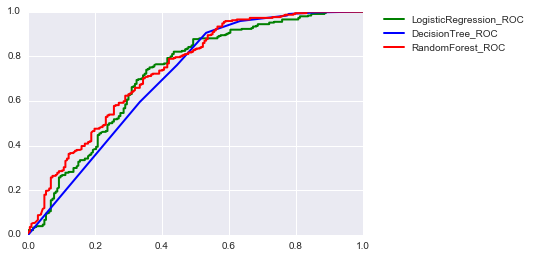

In [37]:
plt.plot(fpr1,tpr1,c='g',label='LogisticRegression_ROC',linewidth=2)
plt.plot(fpr2,tpr2,c='b',label='DecisionTree_ROC',linewidth=2)
plt.plot(fpr3,tpr3,c='r',label='RandomForest_ROC',linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Random Forest is the best model in this case